In [ ]:
#Classic imports
import numpy as np 
import pandas as pd 
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import os 


# Import English using en_core_web_sm.load()
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

import html
import re
import nltk
nltk.download('wordnet')
import wordcloud
from wordcloud import WordCloud,STOPWORDS

from nltk.stem import WordNetLemmatizer
import string 



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping

Importing the training data

In [ ]:
# dataset csv
train_df = pd.read_csv(r"/content/train.csv")
test_df = pd.read_csv(r"/content/test.csv")

# display train
print("Train dataset")
display(train_df.sample(1))

# display test
print("Test dataset")
display(test_df.sample(1))

Train dataset


,id,keyword,location,text,target
5879,8397,sandstorm,NaN,Watch This Airport Get Swallowed Up By A Sands...,1


Test dataset


,id,keyword,location,text
2957,9798,trapped,Ur BaQ,Hollywood movie about trapped miners released ...


Basic statistics

In [ ]:
df = train_df[["text", "target"]].copy()

print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print(" Missing values: ")
print(df.isnull().sum())

Number of rows : 7613

Display of dataset: 


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1



Basics statistics: 


,text,target
count,7613,7613.00000
unique,7503,NaN
top,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,10,NaN
mean,NaN,0.42966
std,NaN,0.49506
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.00000
75%,NaN,1.00000



 Missing values: 
text      0
target    0
dtype: int64


Analysis

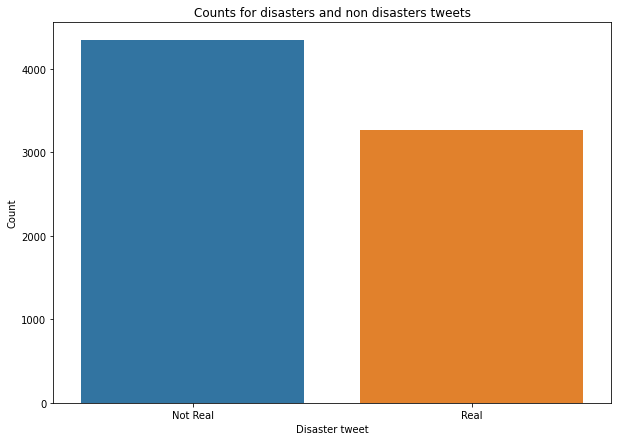

In [ ]:
# number of plot
disaster_count_df = pd.DataFrame(df.groupby(["target"]).size()).reset_index()
disaster_count_df = disaster_count_df.rename(columns={0: "Count", 
                                            "target" : "Disaster tweet"})
disaster_count_df["Disaster tweet"] = disaster_count_df["Disaster tweet"].apply(lambda x : "Real" if x==1 else "Not Real")

# bar plot by conversion class
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Disaster tweet", y="Count", data=disaster_count_df);
plt.title("Counts for disasters and non disasters tweets")
plt.show()

In [ ]:
from collections import defaultdict

In [ ]:
# stop words in dataset

def create_corpus(df, target):
    """ create corpus.
    """
    corpus = []
    for i in df[df['target']==target]['text'].str.split():
        for x in i:
            corpus.append(x)
    return corpus

## stop words : most common words in a language.
def count_stopwords(df, func, target):
    """ analyse stop words.
    """
    df_stopwords = pd.DataFrame(columns=["stop_words", "count"])

    corpus = func(df, target)
    dic = defaultdict(int)

    for word in corpus:
        dic[word] += 1

    top = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:10]
    x_items,y_values = zip(*top)

    # fill dataframe
    df_stopwords["stop_words"] = x_items
    df_stopwords["count"] = y_values
    
    # sort values
    df_stopwords = df_stopwords.sort_values(by=["count"])

    return df_stopwords

#analyzing stopwords for 0 and 1 target labels
df_stopwords_0 = count_stopwords(df, create_corpus, 0)
print("Stop words for Non disaster target")
display(df_stopwords_0)

df_stopwords_1 = count_stopwords(df, create_corpus, 1)
print("Stop words for disaster target")
display(df_stopwords_1)

Stop words for Non disaster target


,stop_words,count
9,for,452
8,is,512
7,you,529
6,in,720
5,of,834
4,and,840
3,I,938
2,to,1099
1,a,1115
0,the,1524


Stop words for disaster target


,stop_words,count
9,is,302
8,for,368
7,on,386
6,-,389
5,and,462
4,to,706
3,a,730
2,of,888
1,in,1037
0,the,1051


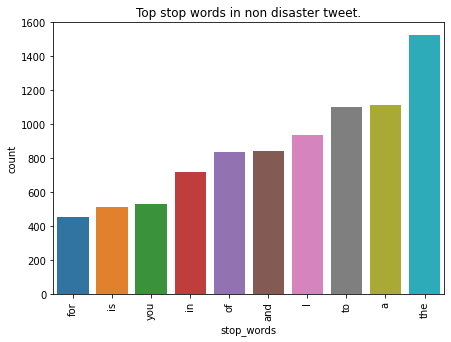

In [ ]:
plt.figure(figsize=(7,5))
ax1 = sns.barplot(x="stop_words", y="count", data=df_stopwords_0);
ax1.tick_params(axis='x', rotation=90)
plt.title("Top stop words in non disaster tweet.")
plt.show()

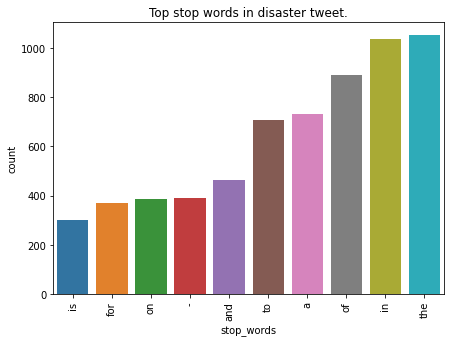

In [ ]:
plt.figure(figsize=(7,5))
ax2 = sns.barplot(x="stop_words", y="count", data=df_stopwords_1);
ax2.tick_params(axis='x', rotation=90)
plt.title("Top stop words in disaster tweet.")
plt.show()

#### Unwanted words
Remove unwanted words with high frequency.

In [ ]:
common_words = ['via','like','build','get','would','one','two','feel',
                'lol','fuck','take','way','may','first','latest','want',
                'make','back','see','know','let','look','come','got',
                'still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

df["Cleaned_text"] = df["text"].apply(text_cleaning)

In [ ]:
df.columns

Index(['text', 'target', 'Cleaned_text'], dtype='object')

Wordcloud

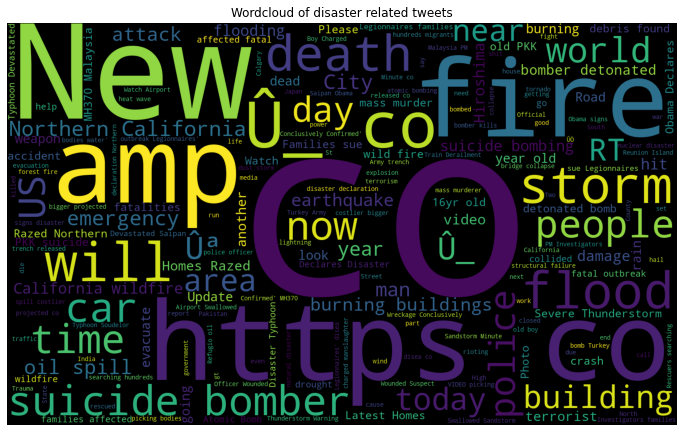

In [ ]:

wc = WordCloud(width = 1500, height = 900).generate(' '.join(df[df['target']==1]['Cleaned_text'].values))

plt.figure(figsize = (12,8))
plt.imshow(wc)
plt.title("Wordcloud of disaster related tweets")
plt.axis('off')
plt.show()

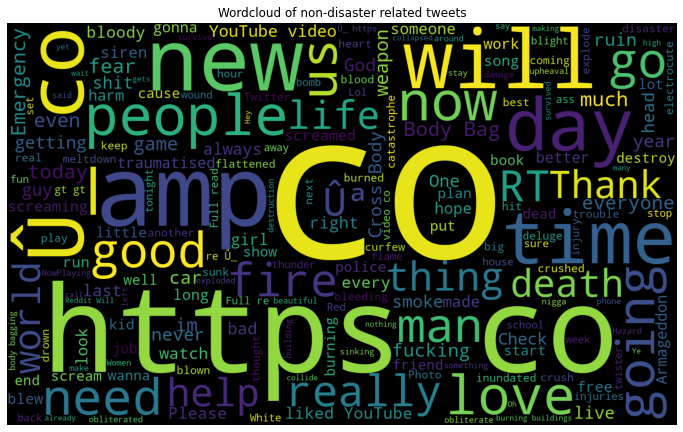

In [ ]:

wc = WordCloud(width = 1500, height = 900).generate(' '.join(df[df['target']==0]['Cleaned_text'].values))


plt.figure(figsize = (12,8))
plt.imshow(wc)
plt.title("Wordcloud of non-disaster related tweets")
plt.axis('off')
plt.show()

In [ ]:
# Tfidf transformer 
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words = 'english', smooth_idf = True)
X = vectorizer.fit_transform(df['Cleaned_text'])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Creating a DataFrame with all the words and tf-idf score 
tfid_df = pd.DataFrame(dense, 
                        columns=[x for x in vectorizer.get_feature_names_out()])

tfid_df

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.420625,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.307889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transpose dataframe

word_count = list()
words = tfid_df.columns.to_list()
word_count = [(tfid_df[z] != 0.0).sum() for z in tfid_df.columns]

In [ ]:
data_word_count = pd.DataFrame(zip(words,word_count), columns = ['word', 'count'])
data_word_count[data_word_count['count']>1].sort_values(by = 'count', ascending=False)[:10]

,word,count
9192,http,3603
9193,https,406
21307,û_,343
10427,just,313
1939,amp,301
13036,new,220
14216,people,195
13050,news,188
5970,don,184
19807,video,157


In [ ]:
df.columns

Index(['text', 'target', 'Cleaned_text'], dtype='object')

Tokenizer

In [ ]:

df['token_length'] = df.Cleaned_text.apply(lambda x: len(x))
number_of_words = df['token_length'].sum()

#Instanciate the tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = number_of_words)

#Fit it on the text before encoding it in sequences
tokenizer.fit_on_texts(df['Cleaned_text'])

#Convert it to sequences
df['encoded_text'] = tokenizer.texts_to_sequences(df['Cleaned_text'])

#We'll drop as well the useless columns we don't need anymore
df = df[['text','target','Cleaned_text','encoded_text','token_length']]

In [ ]:
df.columns

Index(['text', 'target', 'Cleaned_text', 'encoded_text', 'token_length'], dtype='object')

In [ ]:
#Simple verification that we focus only on token that are existing
print('We have {} values before focusing on token >0'.format(df.shape[0]))
data_train = df[df['token_length'] != 0]
print('We have {} values after focusing on token >0'.format(df.shape[0]))

We have 7613 values before focusing on token >0
We have 7613 values after focusing on token >0


In [ ]:
data_train.head()

,text,target,Cleaned_text,encoded_text,token_length
0,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,"[107, 4632, 24, 4, 853, 8, 21, 238, 980, 1615,...",69
1,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,"[168, 44, 205, 784, 6954, 6955, 1399]",38
2,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,"[39, 1748, 1616, 7, 6956, 6, 6957, 24, 124, 69...",133
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[820, 2919, 56, 4634, 1496, 231, 1400, 6, 89]",64
4,Just got sent this photo from Ruby #Alaska as ...,1,Just sent this photo from Ruby #Alaska as smok...,"[33, 1213, 21, 297, 22, 6959, 2156, 29, 246, 2...",83


Training & Validation Set


Padding


In [ ]:

max_length_padding = data_train['token_length'].max()
print(max_length_padding)

153


In [ ]:
#Padding
dataset_padding = tf.keras.preprocessing.sequence.pad_sequences(data_train.encoded_text, padding = 'post', maxlen = max_length_padding)

#Build now the full tensorflow dataset taking into account the padding & target
full_dataset = tf.data.Dataset.from_tensor_slices((dataset_padding,data_train.target))
full_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(153,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
#Let's slice our dataset now as we saw during our course

TAKE_SIZE = int(0.8*data_train.shape[0])
batch_size = 32

train = full_dataset.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train = train.batch(batch_size)

val = full_dataset.skip(TAKE_SIZE)
val = val.batch(batch_size)

In [ ]:
for text, target in train.take(1):
  print(text)

tf.Tensor(
[[18999  2096    20 ...     0     0     0]
 [12441 12442 12443 ...     0     0     0]
 [ 2358  1278   294 ...     0     0     0]
 ...
 [    4   407    48 ...     0     0     0]
 [ 1132     5  4024 ...     0     0     0]
 [ 1303    19  9830 ...     0     0     0]], shape=(32, 153), dtype=int32)


In [ ]:
for text2, target in val.take(1):
  print(text2)

tf.Tensor(
[[  674   270   786 ...     0     0     0]
 [   17   451   270 ...     0     0     0]
 [ 1226   118   270 ...     0     0     0]
 ...
 [   17   451   270 ...     0     0     0]
 [  140    33    49 ...     0     0     0]
 [ 4440   270 19717 ...     0     0     0]], shape=(32, 153), dtype=int32)


In [ ]:

size_vocab = tokenizer.num_words + int(1)
print(size_vocab)

757059


In [ ]:
#building a binary classificator model
model = tf.keras.Sequential([
                             #Couche d'input Embedding
                             tf.keras.layers.Embedding(size_vocab, batch_size, input_shape = [text.shape[1]]),
                             tf.keras.layers.Conv1D(32, 3, activation = 'relu'),
                             # flatten output
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             #We use a sigmoid in the output layer to represent our probability 0 or 1
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 153, 32)           24225888  
                                                                 
 conv1d (Conv1D)             (None, 151, 32)           3104      
                                                                 
 flatten (Flatten)           (None, 4832)              0         
                                                                 
 dense (Dense)               (None, 512)               2474496   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 5

In [ ]:

initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam()

#Binary cross entropy is specific to binary classification issues
model.compile(optimizer= optimizer, loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data = val, epochs = 10)


Epoch 1/10
191/191 [==============================] - 66s 336ms/step - loss: 0.5906 - accuracy: 0.6713 - val_loss: 0.5244 - val_accuracy: 0.7663
Epoch 2/10
191/191 [==============================] - 61s 321ms/step - loss: 0.3009 - accuracy: 0.8844 - val_loss: 0.4796 - val_accuracy: 0.7807
Epoch 3/10
191/191 [==============================] - 61s 320ms/step - loss: 0.1017 - accuracy: 0.9665 - val_loss: 0.5867 - val_accuracy: 0.7518
Epoch 4/10
191/191 [==============================] - 61s 320ms/step - loss: 0.0416 - accuracy: 0.9856 - val_loss: 0.6443 - val_accuracy: 0.7538
Epoch 5/10
191/191 [==============================] - 62s 324ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.7982 - val_accuracy: 0.7452
Epoch 6/10
191/191 [==============================] - 62s 323ms/step - loss: 0.0128 - accuracy: 0.9943 - val_loss: 0.9124 - val_accuracy: 0.7334
Epoch 7/10
191/191 [==============================] - 62s 323ms/step - loss: 0.0097 - accuracy: 0.9952 - val_loss: 0.9513 - val_ac

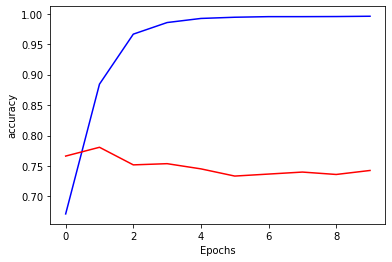

In [ ]:
#Visualization of the training process on the accuracy
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

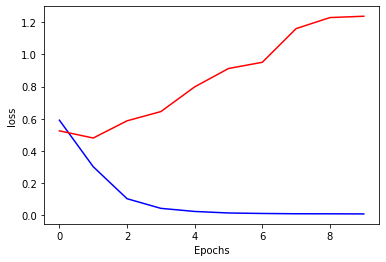

In [ ]:
# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

In [ ]:
model = tf.keras.Sequential([
                             #Couche d'input Embedding
                             tf.keras.layers.Embedding(size_vocab, batch_size, input_shape = [text.shape[1]]),
                             tf.keras.layers.Conv1D(32, 3, activation = 'relu'),
                             # flatten output
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.6),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             #We use a sigmoid in the output layer to represent our probability 0 or 1
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.compile(optimizer= optimizer, loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(train, validation_data = val, epochs = 2)

Epoch 1/2
191/191 [==============================] - 76s 388ms/step - loss: 0.5364 - accuracy: 0.7386 - val_loss: 0.4539 - val_accuracy: 0.7997
Epoch 2/2
191/191 [==============================] - 58s 302ms/step - loss: 0.2381 - accuracy: 0.9118 - val_loss: 0.5525 - val_accuracy: 0.7682


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras import Model

In [ ]:
model.save('model.h5')